In [1]:
import os
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from statsmodels.graphics.tsaplots import plot_predict, plot_acf, plot_pacf
from sklearn.utils import shuffle
import math
from scipy import stats


In [2]:
data = pd.read_csv('/Users/_fangkhai/Documents/Computer Science Semester 5/Introduction to Data Science/Assignment Dataset/INFY Historical Data.csv').fillna(0)
data["Date"] = pd.to_datetime(data.Date)
data.set_index ("Date", inplace = True)
data.dtypes

FileNotFoundError: [Errno 2] No such file or directory: '/Users/_fangkhai/Documents/Computer Science Semester 5/Introduction to Data Science/Assignment Dataset/INFY Historical Data.csv'

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data["Price"] = data["Price"].str.replace(",", "")
data["Open"] = data["Open"].str.replace(",", "")
data["High"] = data["High"].str.replace(",", "")
data["Low"] = data["Low"].str.replace(",", "")
data["Vol."] = data["Vol."].str.replace("M", "")
data["Change %"] = data["Change %"].str.replace("%", "")

In [ ]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')
data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')

In [3]:
corr = data.corr()
plt.figure(figsize = (12, 7))
sns.heatmap(corr, annot = True)

NameError: name 'data' is not defined

In [4]:
data.isnull().sum()

NameError: name 'data' is not defined

In [5]:
data.dtypes

NameError: name 'data' is not defined

In [6]:
data = data.fillna(data["Vol."].mean())

NameError: name 'data' is not defined

In [7]:
data.isnull().sum()

NameError: name 'data' is not defined

In [8]:
z = np.abs(stats.zscore(data))
z

NameError: name 'data' is not defined

In [9]:
(np.abs(stats.zscore(data)) > 3).sum()

NameError: name 'data' is not defined

In [10]:
data_clean = data[((np.abs(stats.zscore(data)))<3).all(axis=1)]
data_clean

NameError: name 'data' is not defined

NameError: name 'data' is not defined

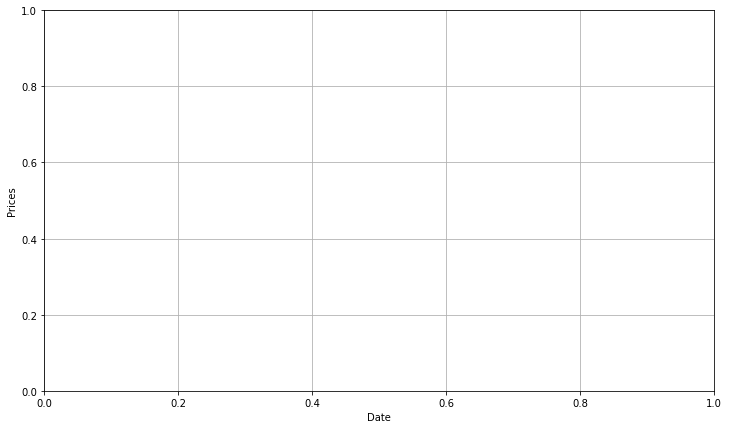

In [11]:
plt.figure(figsize=(12,7))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Prices")
plt.plot(data["Price"])
plt.title("Infosys Share Price")
plt.show()

In [12]:
df = data["Price"]
df.plot(kind = "kde")

NameError: name 'data' is not defined

### SelectKBest

In [17]:
open_price_crosstab = pd.crosstab(data["Open"], data["Price"], margins = True)
open_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Open,,,,,,,,,,,,,,,,,,,,,
117.63,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
117.82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118.38,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118.44,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118.75,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238.45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1243.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1249.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
high_price_crosstab = pd.crosstab(data["High"], data["Price"], margins = True)
high_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
High,,,,,,,,,,,,,,,,,,,,,
118.75,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.18,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.37,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.99,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1254.45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1258.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [19]:
low_price_crosstab = pd.crosstab(data["Low"], data["Price"], margins = True)
low_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Low,,,,,,,,,,,,,,,,,,,,,
116.28,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
116.36,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
116.45,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
116.7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
117.2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1236.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1238.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [20]:
vol_price_crosstab = pd.crosstab(data["Vol."], data["Price"], margins = True)
vol_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Vol.,,,,,,,,,,,,,,,,,,,,,
1.09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92.85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
98.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
164.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
change_price_crosstab = pd.crosstab(data["Change %"], data["Price"], margins = True)
change_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Change %,,,,,,,,,,,,,,,,,,,,,
-21.26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-16.19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-13.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-12.66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-10.04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13.02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
shuffled_data = shuffle(data, random_state = 800)

#X = Independent Variable
target_col = "Price"
X = data.drop("Price", axis = 1)

#y = Dependent Variable
y = shuffled_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 800)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2777, 5) (1191, 5) (2777,) (1191,)


In [23]:
X_n = SelectKBest(f_classif, k = 1).fit_transform(X, y)
X_n.shape

#Another method (Giving Same Results)

X_new = SelectKBest(f_classif, k = 1).fit(X_train, y_train)
X_train.columns[X_new.get_support()]

Index(['Low'], dtype='object')

In [24]:
pd.crosstab(np.squeeze(X_n), np.squeeze(y))

Price,117.00,117.91,118.16,118.17,118.21,118.60,118.62,118.68,118.70,118.76,...,1175.20,1177.30,1189.80,1220.50,1236.05,1240.30,1246.80,1250.30,1253.05,1255.80
row_0,,,,,,,,,,,,,,,,,,,,,
116.28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116.36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116.45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116.70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117.20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1235.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1236.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data = data.groupby("Date").sum()

In [26]:
data = data.resample(rule = 'MS').sum()

In [27]:
data.head(10)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2005-01-01,2352.36,2369.36,2416.32,2312.63,444.13,-0.69
2005-02-01,2634.80,2631.08,2658.07,2599.79,284.87,8.16
2005-03-01,3013.97,3015.34,3049.32,2976.80,259.22,0.98
2005-04-01,2533.99,2553.12,2583.44,2501.42,372.82,-17.44
2005-05-01,2845.35,2819.40,2874.05,2796.44,376.74,17.92
2005-06-01,3257.01,3245.84,3294.02,3213.51,321.51,4.95
2005-07-01,2809.92,2824.55,2854.74,2777.95,337.80,-3.52
2005-08-01,3133.15,3129.84,3164.64,3096.35,263.07,4.83
2005-09-01,3180.19,3179.49,3213.31,3143.01,244.24,5.94


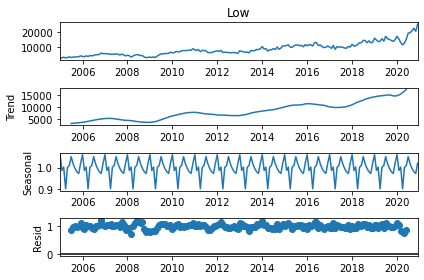

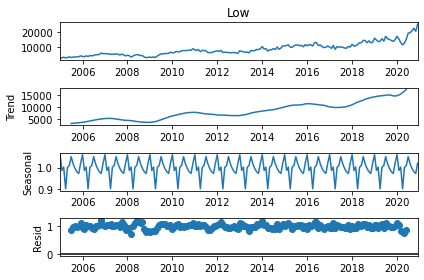

In [28]:
result = seasonal_decompose(data["Low"], model = "multiplicable", period = 12)
result.plot()

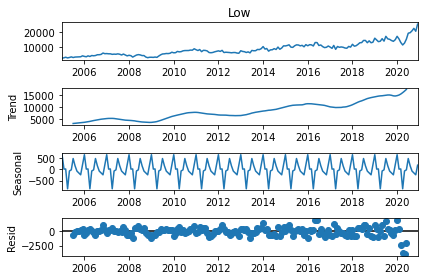

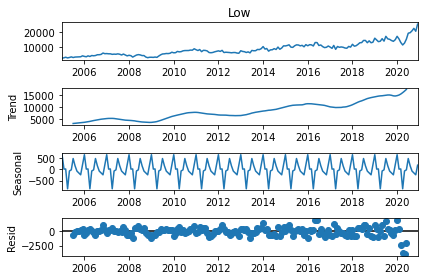

In [29]:
result = seasonal_decompose(data["Low"], model = "additive", period = 12)
result.plot()

In [30]:
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]

### Using Trend = add and Seasonal = mul

In [31]:
model = ExponentialSmoothing(train["Low"], trend = "add", seasonal = "mul", seasonal_periods = 12).fit()

In [32]:
test_pred = model.forecast(58)

In [33]:
test_pred

2016-03-01    11742.209508
2016-04-01    10256.001380
2016-05-01    11167.273012
2016-06-01    11625.318301
2016-07-01    12310.028806
2016-08-01    11750.889176
2016-09-01    11949.999896
2016-10-01    11871.562721
2016-11-01    11908.267561
2016-12-01    13007.120404
2017-01-01    13268.184218
2017-02-01    12547.461816
2017-03-01    13028.735400
2017-04-01    11369.525191
2017-05-01    12368.864538
2017-06-01    12865.078757
2017-07-01    13611.245125
2017-08-01    12982.156534
2017-09-01    13191.291606
2017-10-01    13094.124191
2017-11-01    13124.174237
2017-12-01    14324.021350
2018-01-01    14600.277530
2018-02-01    13796.744283
2018-03-01    14315.261292
2018-04-01    12483.049003
2018-05-01    13570.456064
2018-06-01    14104.839213
2018-07-01    14912.461444
2018-08-01    14213.423893
2018-09-01    14432.583315
2018-10-01    14316.685660
2018-11-01    14340.080913
2018-12-01    15640.922296
2019-01-01    15932.370842
2019-02-01    15046.026749
2019-03-01    15601.787184
2

<AxesSubplot:xlabel='Date'>

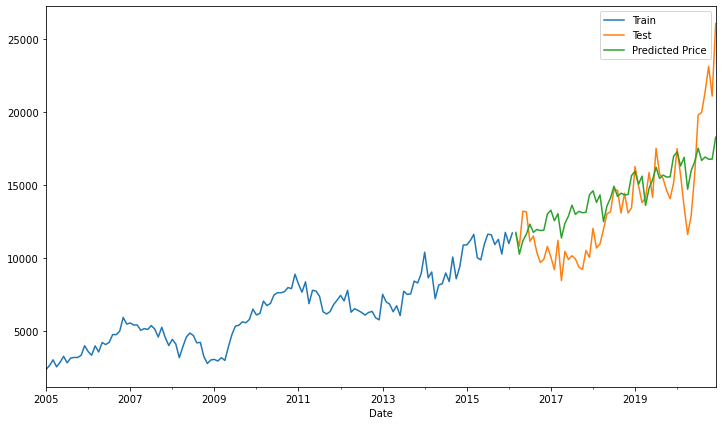

In [34]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [35]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

16.12782528916137

In [36]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

2046.2399653970706

In [37]:
mse = mean_squared_error(test["Price"], test_pred)
rmse = math.sqrt(mse)
rmse

2582.613292392349

### Using Trend = mul and Seasonal = mul

In [38]:
model = ExponentialSmoothing(train["Low"], trend = "mul", seasonal = "mul", seasonal_periods = 12).fit()

/Users/_fangkhai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [39]:
test_pred = model.forecast(58)

<AxesSubplot:xlabel='Date'>

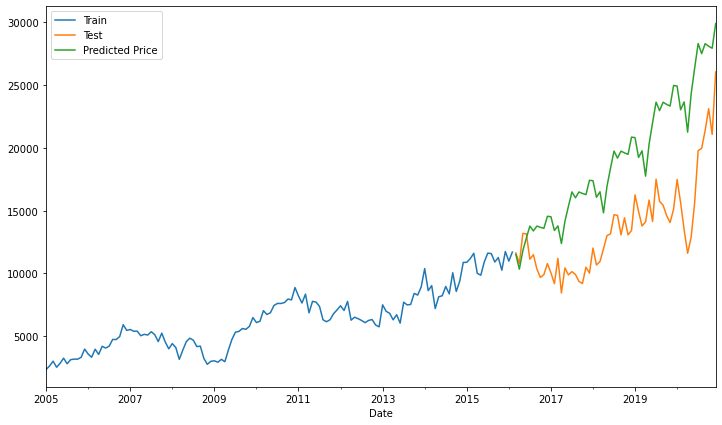

In [40]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [41]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

42.791601360134386

In [42]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

5611.449509840078

In [43]:
mse = mean_squared_error(test["Price"], test_pred)
mse

37901409.86433595

In [44]:
rmse = math.sqrt(mse)
rmse

6156.412093446633

### Using Trend = add and Seasonal = add

In [45]:
model = ExponentialSmoothing(train["Low"], trend = "add", seasonal = "add", seasonal_periods = 12).fit()

In [46]:
test_pred = model.forecast(58)

<AxesSubplot:xlabel='Date'>

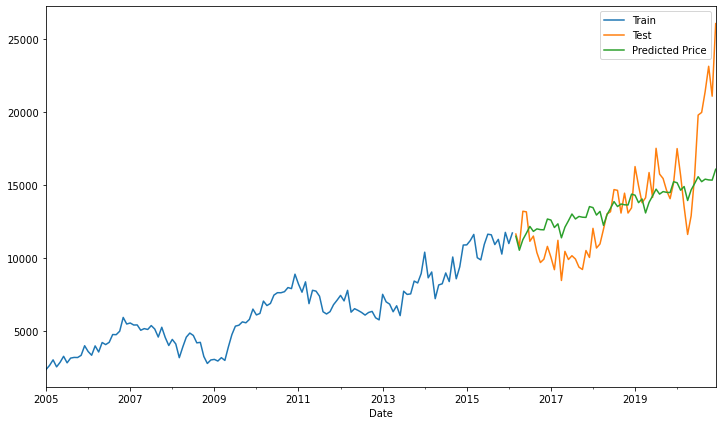

In [47]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [48]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

14.834549922411117

In [49]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

2010.2546658826177

In [50]:
mse = mean_squared_error(test["Price"], test_pred)
mse

7576030.861757702

In [51]:
rmse = math.sqrt(mse)
rmse

2752.4590572354937

### Using Trend = mul and Seasonal = add

In [52]:
model = ExponentialSmoothing(train["Low"], trend = "mul", seasonal = "add", seasonal_periods = 12).fit()

In [53]:
test_pred = model.forecast(58)

<AxesSubplot:xlabel='Date'>

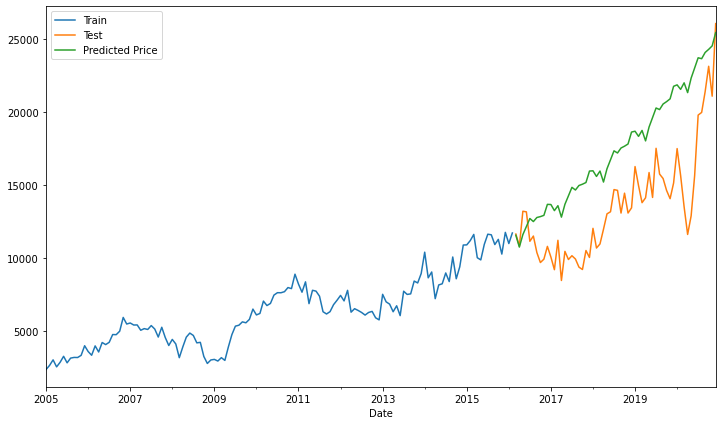

In [54]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [55]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

31.86290622502016

In [56]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

4010.01618932415

In [57]:
mse = mean_squared_error(test["Price"], test_pred)
rmse = math.sqrt(mse)
rmse

4494.96911328665

### Final Model Built Based On Entire DataSet (Extra)

In [58]:
# final_model = ExponentialSmoothing(data["Price"], trend = "add", seasonal = "mul", seasonal_periods = 24).fit()

In [59]:
# pred = final_model.forecast(5)

In [60]:
# pred

In [61]:
# data["Price"].plot(legend = True, label = "Price", figsize = (12, 7))
# pred.plot(legend = True, label = "Predicted Price")